<a href="https://colab.research.google.com/github/yashveersinghsohi/Dive_into_Deep_Learning_Practice/blob/chapter_2.6/chapter_2/ch_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Book Link](https://d2l.ai/chapter_preliminaries/probability.html)

# Imports

In [13]:
import random
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt

# Tossing Coins

In [7]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
heads, tails

(50, 50)

In [9]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([46., 54.])

In [10]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(10000, fair_probs).sample() / 10000

tensor([0.5085, 0.4915])

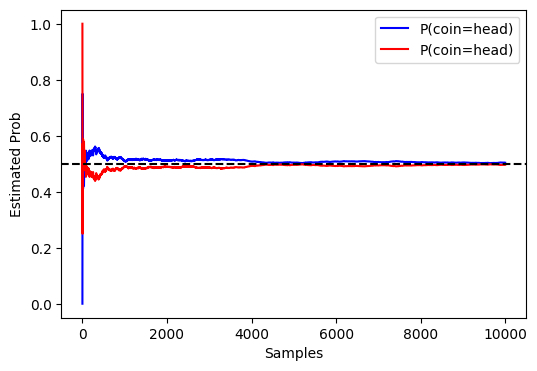

In [17]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts/cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(estimates[:, 0], label='P(coin=head)', color='blue')
ax.plot(estimates[:, 1], label='P(coin=head)', color='red')
ax.set(xlabel='Samples', ylabel='Estimated Prob')
ax.axhline(y=0.5, color='k', linestyle='--')
ax.legend()
plt.show()